# Question 1

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

first of all importing csv file from the pc or laptop and read the file with pandas function

question:- A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyse the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [2]:
data=pd.read_csv('Cutlets.csv')
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
data1=pd.Series(data.iloc[:,0])
data1.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [5]:
data1.mean()

7.01909142857143

In [6]:
data2=pd.Series(data.iloc[:,1])
data2.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [7]:
data2.mean()

6.964297142857142

Mean of the both unit cutlet samples are near to eqal.

lets assuming for 95% confidence interval and significance level of 5%, 

..>Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units).
..>Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units) 2 Sample 2 Tail test applicable

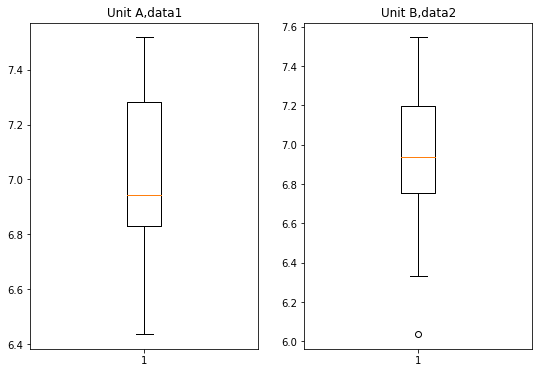

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Unit A'])
plt.title('Unit A,data1')
plt.subplot(122)
plt.boxplot(data['Unit B'])
plt.title('Unit B,data2')
plt.show()

In [9]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(data1,data2)
np.round(p_value,4)

array([0.7229, 0.4722])

In [10]:
np.round(p_value[1],4)     # 2-tail probability # just for our info.

0.4722

now comparing the p_value with α = 0.05 (At 5% significance level)

p_value(0.4722) > α = 0.05

# Answer: so we accept the null hypothesis because the mean of the unitA and UnitB are almost eqaul and p_values greater than the alpha value

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyse the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [12]:
labtat=pd.read_csv("labTAT.csv")
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


I do a ANOVA Test on 4 Independent samples with Numerical Data. so I need to check whether the mean of any of these samples are same or not.

Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

Null Hypothesis: μ1 = μ2 = μ3 = μ4 

Alternative Hypthosis: Atleast One of them is Differente

In [13]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [14]:
# cheking null values

labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

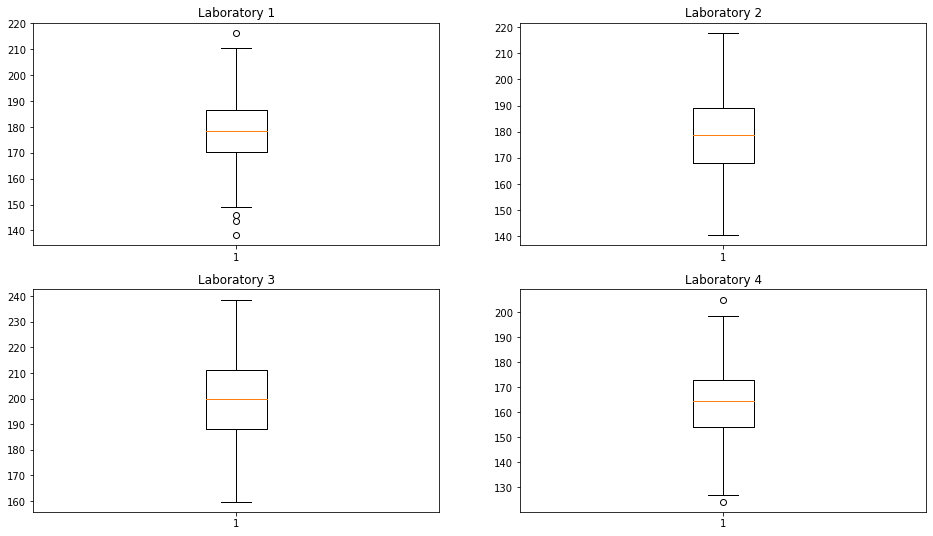

In [15]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

### there are some outliers in laboratory 1 and laboratory 4

Compare Evidences with Hypothesis using t-statictic

In [16]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


## Answer : As per calculation and comparing p_value with alpha, we reject the null hypothesis because p_value is very less comare to alpha 

# Question 3

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

        East  West  North  South
male    50    142   131    70

female  550   351   480    350

H0 = All proportions are equal

H1 = not all proportions are equal


1) Check p_value 2) if p_value < alpha, we reject the null hypothesis


Significance value = 5%
alpha = 0.05

In [2]:
DF = pd.read_csv("BuyerRatio.csv")
DF

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [3]:
DF.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


The chi2_contingency() function of scipy. stats module takes as input, the contingency table in 2d array format. It returns a tuple containing test statistics, the p-value, degrees of freedom and expected table(the one we created from the calculated values) in that order.

In [12]:
stats.chi2_contingency([DF["East"], DF["West"], DF["North"], DF["South"]])


(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

now comaring p_value with alpha

p_value =  0.660309

alpha - 0.05

p_value > alpha, so we can accept the null hypothesis

# Question 4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


Significance value = 5%
alpha = 0.05

Since there are more than 2 variable we will perform Chi-Square test

H0 = The defective % does not varies by centre

H1 = The defective % does varies by centre

In [16]:
defective=pd.read_csv("Costomer+OrderForm.csv")
defective.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [17]:
defective.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [20]:
defective.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [26]:
stats.chi2_contingency([defective['Phillippines'].value_counts(),
                        defective['Indonesia'].value_counts(), 
                        defective['Malta'].value_counts(), 
                        defective['India'].value_counts()])

(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default

now comparing p_valu with alpha

p_value = 0.2771020991233144

alpha = 0.05

# Answer: p_value > alpha, so we can accept the null hypothesis. The defective % does not varies significantly by centres